In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [81]:
df = pd.read_csv("Datasets/loan_data.csv")

In [82]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [84]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [85]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [86]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [87]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [89]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [90]:
df.Dependents = df.Dependents.fillna(0)

In [91]:
df.Dependents.unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [92]:
df.Dependents = df.Dependents.replace(to_replace="3+", value=4)
df.Dependents = df.Dependents.astype(int)
df.Dependents.unique()

array([0, 1, 2, 4])

In [93]:
df.Loan_Status=df.Loan_Status.apply(lambda x: 1 if 'Y' in x else 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(2), object(6)
memory usage: 60.1+ KB


<AxesSubplot:xlabel='Education', ylabel='count'>

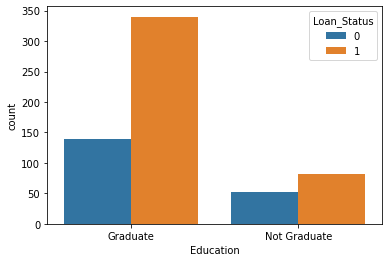

In [94]:
sns.countplot(x='Education', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

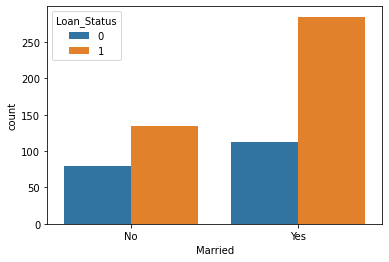

In [95]:
sns.countplot(x='Married', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

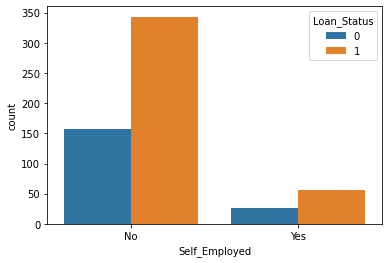

In [96]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

In [97]:
df.replace({'Gender': {'Male':1, 'Female':0}, 'Married': {'Yes': 1, 'No':0}, 'Education': {'Graduate': 1, 'Not Graduate': 0}, 
           'Self_Employed': {'Yes': 1, 'No': 0}, 'Property_Area': {'Rural': 0, 'Semiurban':1, 'Urban':2}}, inplace=True)

#### Gender: Male:1, Female:0
#### Married': Yes: 1, No:0
#### Education: Graduate: 1, Not Graduate: 0
#### Self_Employed: Yes: 1, No: 0
#### Property_Area':  Rural: 0, Semiurban: 1, Urban: 2

In [98]:
df = df.drop(['Loan_ID'], axis='columns')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [99]:
df.isnull().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [100]:
df = df.dropna()

In [101]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,1.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,2,1


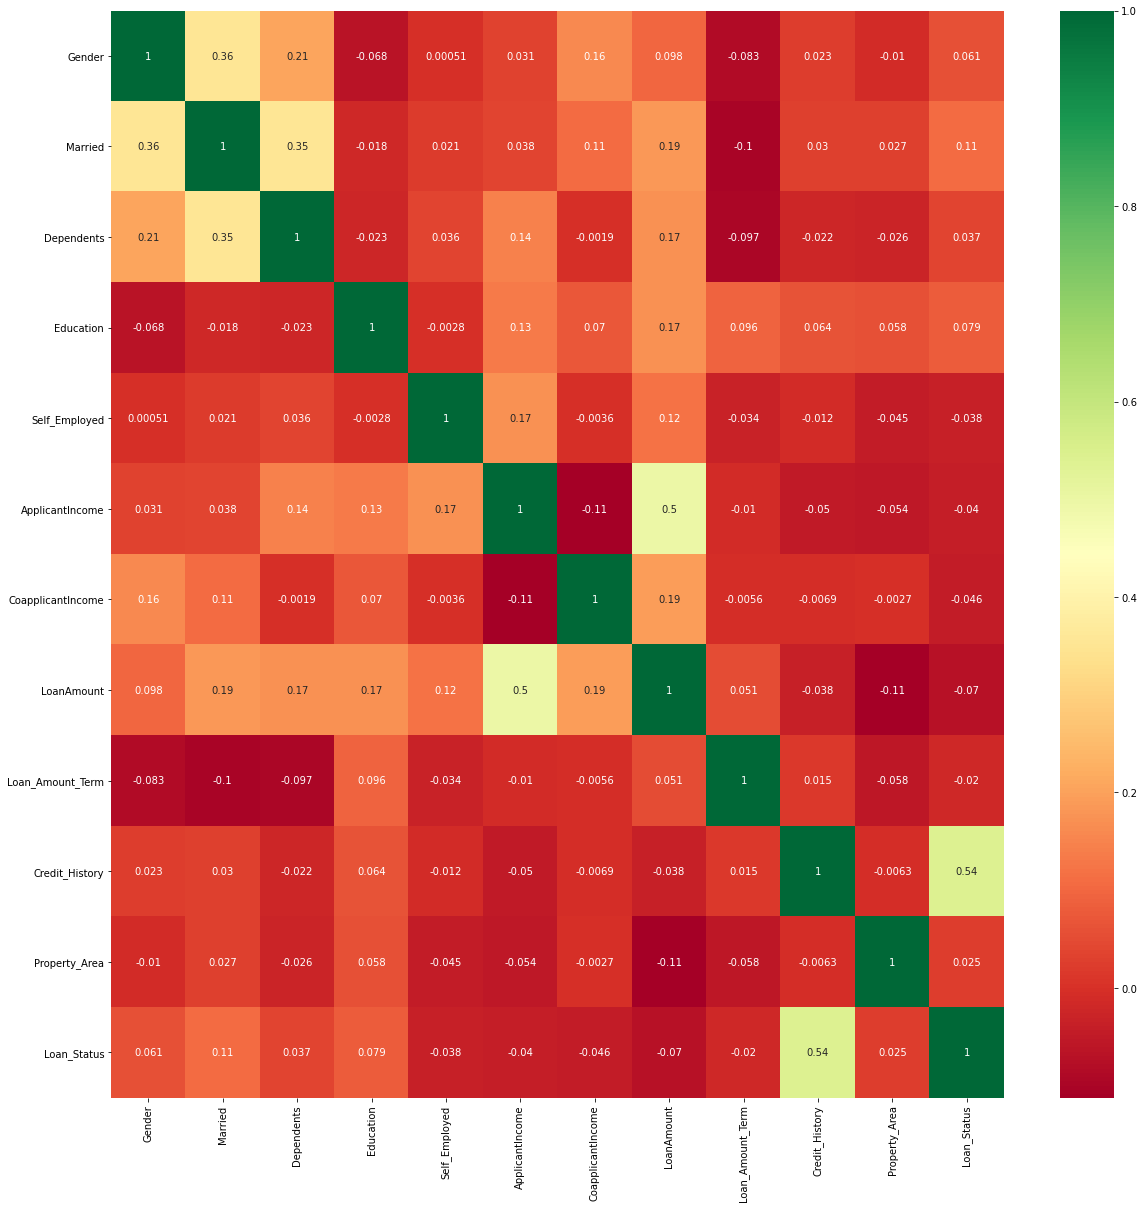

In [102]:
core = df.corr()
coreplot = core.index
plt.figure(figsize=(20,20))
p = sns.heatmap(df[coreplot].corr(), annot=True, cmap="RdYlGn")

In [103]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.355219,0.206796,-0.067541,0.000505,0.031353,0.158712,0.097701,-0.082987,0.022602,-0.010170,0.061191
Married,0.355219,1.000000,0.354857,-0.017515,0.020571,0.037504,0.109130,0.186532,-0.103117,0.029892,0.027175,0.106965
Dependents,0.206796,0.354857,1.000000,-0.023478,0.036067,0.144659,-0.001889,0.172055,-0.096571,-0.021570,-0.025530,0.036523
Education,-0.067541,-0.017515,-0.023478,1.000000,-0.002787,0.132750,0.070156,0.171079,0.095572,0.063627,0.057717,0.078867
Self_Employed,0.000505,0.020571,0.036067,-0.002787,1.000000,0.170571,-0.003575,0.120373,-0.034030,-0.012289,-0.045231,-0.037655
ApplicantIncome,0.031353,0.037504,0.144659,0.132750,0.170571,1.000000,-0.111163,0.496095,-0.010453,-0.049757,-0.053886,-0.040048
CoapplicantIncome,0.158712,0.109130,-0.001889,0.070156,-0.003575,-0.111163,1.000000,0.192814,-0.005599,-0.006943,-0.002716,-0.045667
LoanAmount,0.097701,0.186532,0.172055,0.171079,0.120373,0.496095,0.192814,1.000000,0.050965,-0.037540,-0.112407,-0.070103
Loan_Amount_Term,-0.082987,-0.103117,-0.096571,0.095572,-0.034030,-0.010453,-0.005599,0.050965,1.000000,0.014950,-0.057688,-0.020403
Credit_History,0.022602,0.029892,-0.021570,0.063627,-0.012289,-0.049757,-0.006943,-0.037540,0.014950,1.000000,-0.006255,0.542468


In [104]:
X = df.drop(['Loan_Status'], axis='columns')
y = df.Loan_Status

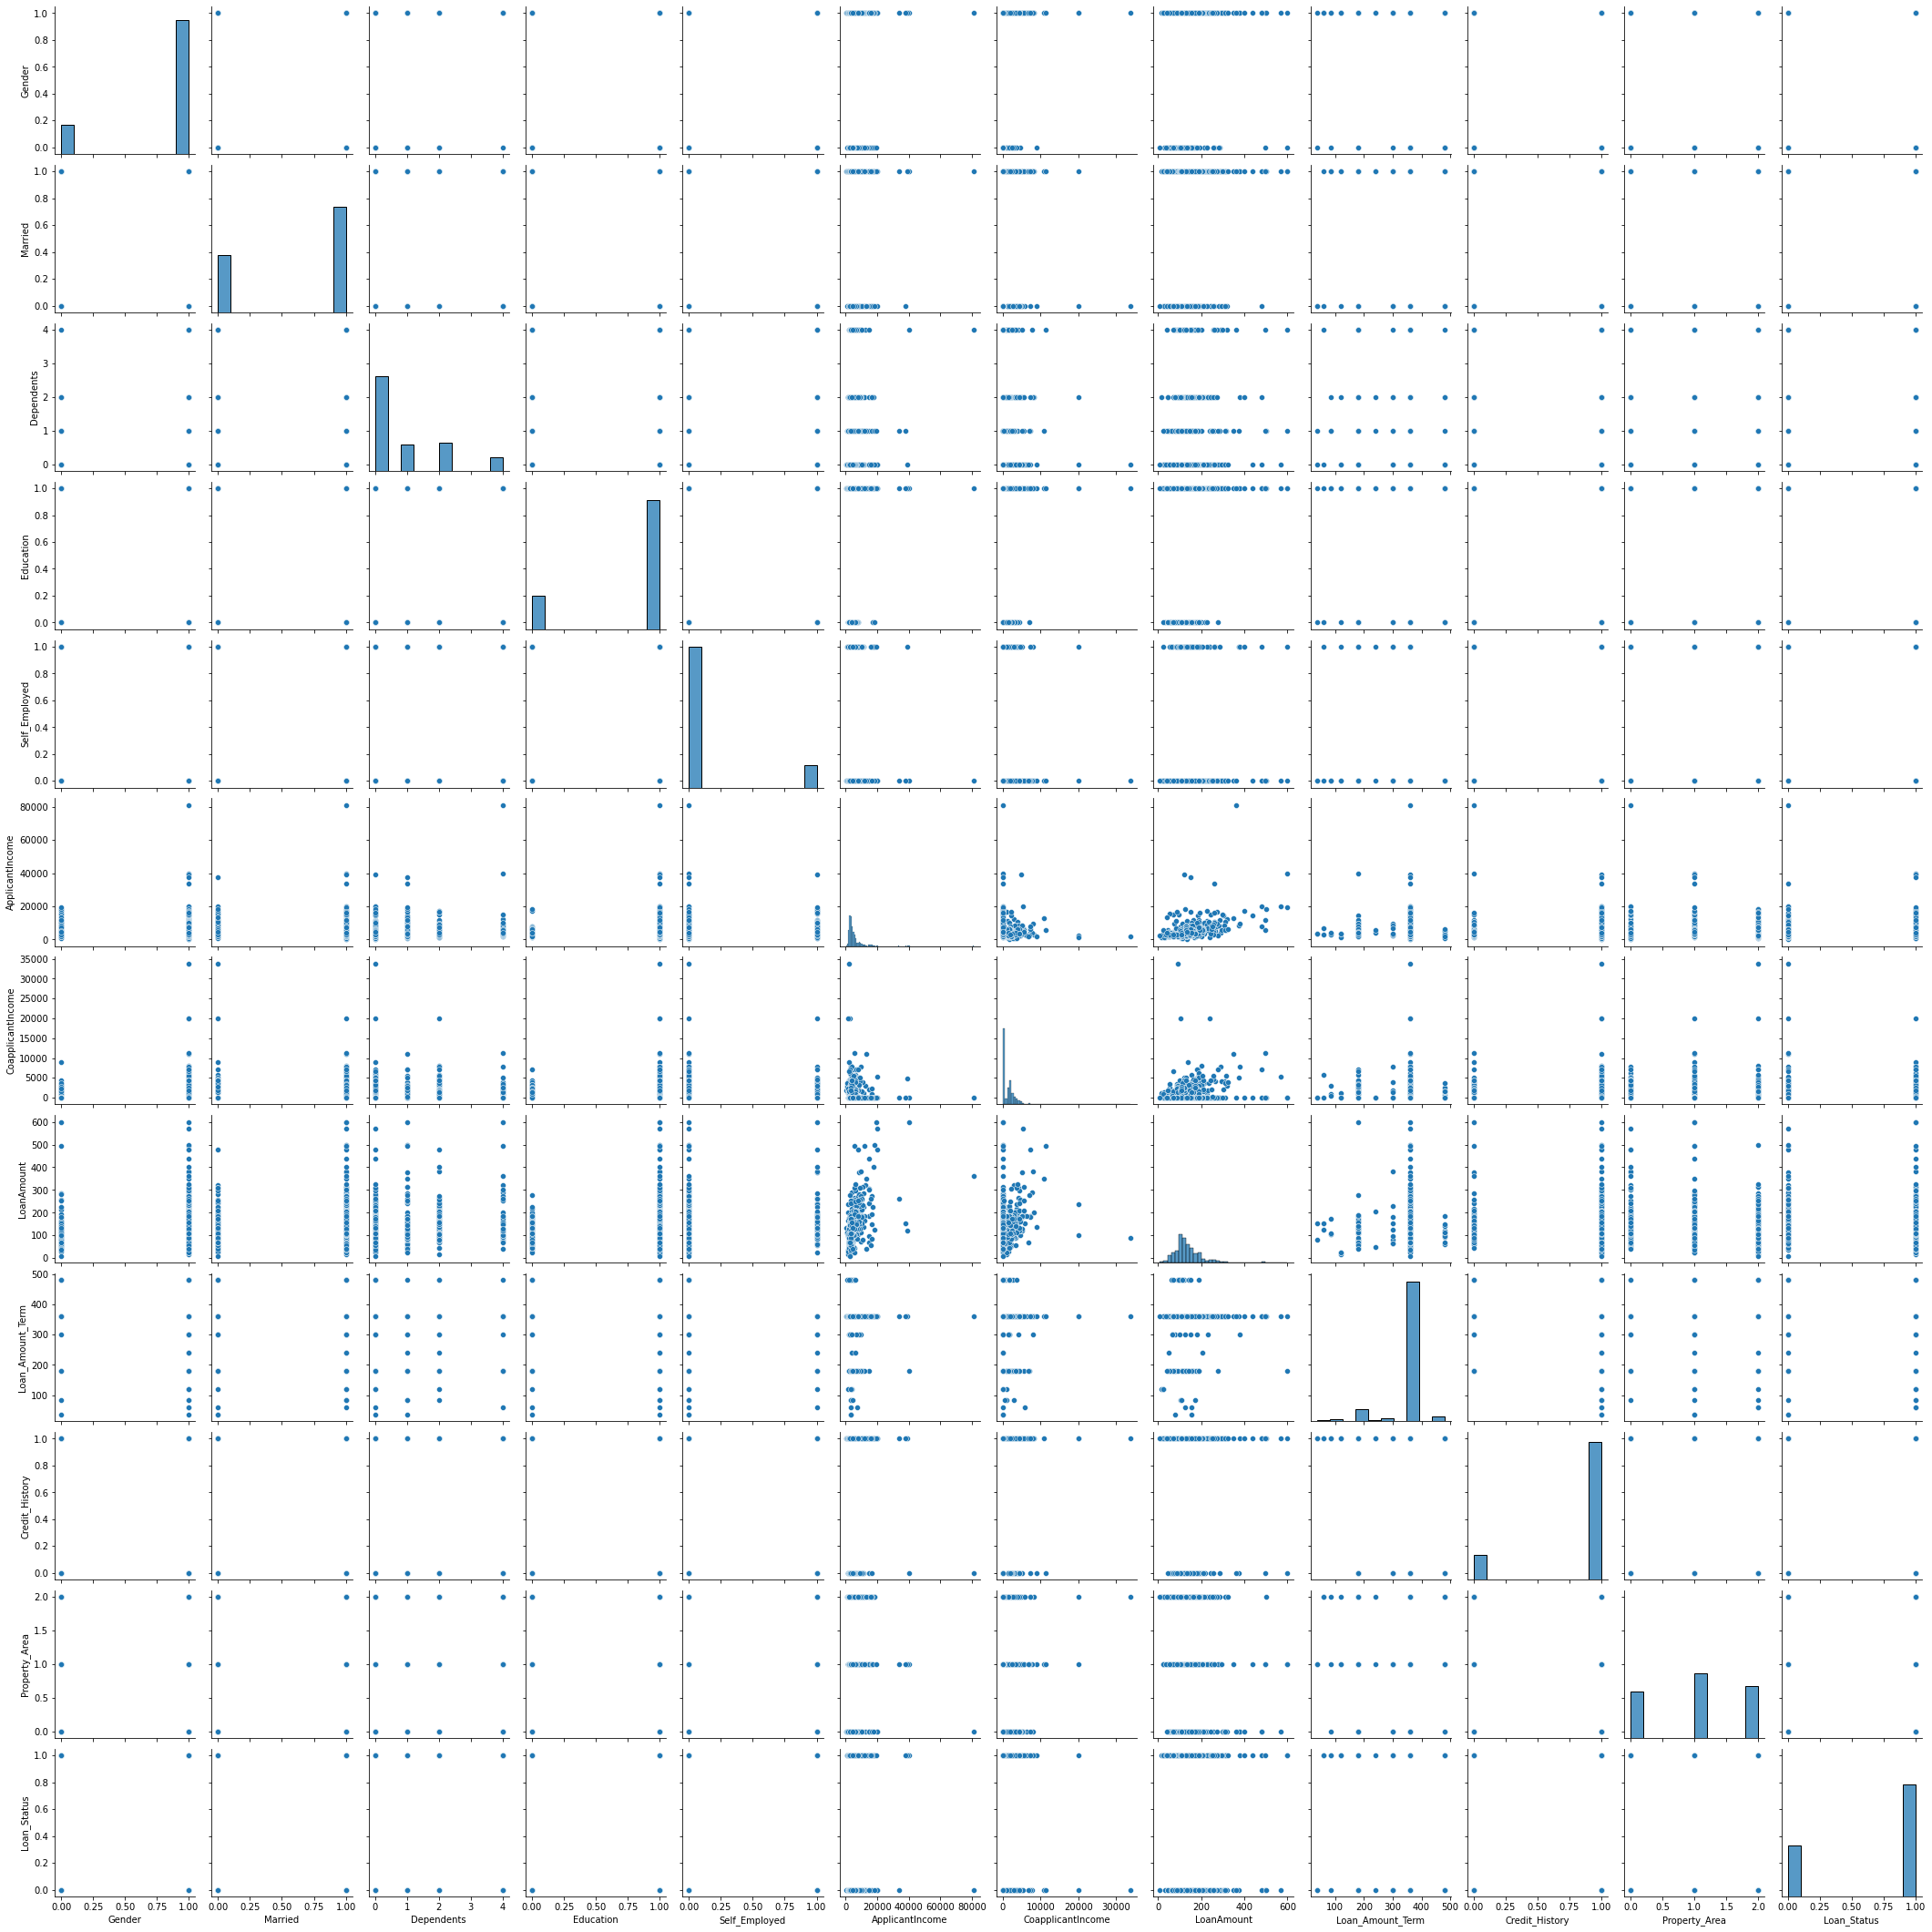

In [105]:
sns.pairplot(df)

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_trian, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [107]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
297,0.0,1.0,1,1,0.0,4666,0.0,135.0,360.0,1.0,2
227,1.0,1.0,2,1,0.0,6250,1695.0,210.0,360.0,1.0,1
549,1.0,1.0,0,1,0.0,2785,2016.0,110.0,360.0,1.0,0
408,1.0,1.0,1,1,0.0,8300,0.0,152.0,300.0,0.0,1
18,1.0,1.0,0,0,0.0,4887,0.0,133.0,360.0,1.0,0


In [108]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [109]:
def find_best_model_gridsearchcv(X,y):
    algos = {
        
        'SVM': {
            'model': SVC(),
            'params': {
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                'gamma' : ['scale', 'auto']
             }
        },
        'DecisionTreeRegressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'],
                'splitter' : ['best', 'random']
             }
        },
        'GaussianNB': {
            'model': GaussianNB(),
            'params': {
                
             }
        },
        'RandomForestClassifier': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [50,100,150,200],
                'random_state': [0,1,2,3,4,5,6,7,8,10],
                'max_samples' : [0.2,0.4,0.5,0.6,0.8],
                'max_features': [0.25,0.50,0.75],
                'max_depth': [5,10,15,20]
             }
        }
    
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [ ]:
find_best_model_gridsearchcv(X,y)